# **DSE 301 -** Artificial Intelligence and its Scientific Applications

# **Project :** LSTM Neural Networks: \\COVID-19 Time Series Forecasting

*Group Members :* 

1.   Krishna Prahlaadh R. (17129)
2.   Saniya Shinde (17241)


In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional

covid_india_data = pd.read_csv("covid_19_india.csv")

n_steps = 3           # number of timesteps we would like to consider at a time
n_features = 1       # the "feature" of the input at these timestamps, i.e., the output corresponding to an input array of length
# n_steps is an array of length n_features
n_days=10             # No of days for which we are predicting - in the case of Bidirectional LSTM
pred_days=10       # No of days for which we are predicting - in the case of Vanilla LSTM

# All the following LSTM models have been developed for univariate time series forecasting

In [209]:
# splits a given univariate sequence into multiple samples where each sample has a specified number of time steps and the output is a single time step
def split_sequence(sequence, n_steps):
	x, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		x.append(seq_x)
		y.append(seq_y)
	return np.array(x), np.array(y) 

# India

## Infected Cases

In [210]:
# Data extraction and preprocessing to convert it to an array

I_data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
D_data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
R_data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

I_data = I_data.drop(columns=["Lat","Long"])
new_I = I_data.loc[I_data["Country/Region"]=="India"]
l=len(new_I.columns)-1
new_I.iloc[0,l]
I_act=[]

new_I.iloc[0,2]

for i in range(10,len(new_I.columns)):
    I_act.append(new_I.iloc[0,i])

for i in range(len(I_act)):
    print('Day', i, ':', I_act[i])

I_cases = np.asarray(I_act)

x_raw, y = split_sequence(I_act, n_steps)

Day 0 : 1
Day 1 : 1
Day 2 : 1
Day 3 : 2
Day 4 : 3
Day 5 : 3
Day 6 : 3
Day 7 : 3
Day 8 : 3
Day 9 : 3
Day 10 : 3
Day 11 : 3
Day 12 : 3
Day 13 : 3
Day 14 : 3
Day 15 : 3
Day 16 : 3
Day 17 : 3
Day 18 : 3
Day 19 : 3
Day 20 : 3
Day 21 : 3
Day 22 : 3
Day 23 : 3
Day 24 : 3
Day 25 : 3
Day 26 : 3
Day 27 : 3
Day 28 : 3
Day 29 : 3
Day 30 : 3
Day 31 : 3
Day 32 : 5
Day 33 : 5
Day 34 : 28
Day 35 : 30
Day 36 : 31
Day 37 : 34
Day 38 : 39
Day 39 : 43
Day 40 : 56
Day 41 : 62
Day 42 : 73
Day 43 : 82
Day 44 : 102
Day 45 : 113
Day 46 : 119
Day 47 : 142
Day 48 : 156
Day 49 : 194
Day 50 : 244
Day 51 : 330
Day 52 : 396
Day 53 : 499
Day 54 : 536
Day 55 : 657
Day 56 : 727
Day 57 : 887
Day 58 : 987
Day 59 : 1024
Day 60 : 1251
Day 61 : 1397
Day 62 : 1998
Day 63 : 2543
Day 64 : 2567
Day 65 : 3082
Day 66 : 3588
Day 67 : 4778
Day 68 : 5311
Day 69 : 5916
Day 70 : 6725
Day 71 : 7598
Day 72 : 8446
Day 73 : 9205
Day 74 : 10453
Day 75 : 11487
Day 76 : 12322
Day 77 : 13430
Day 78 : 14352
Day 79 : 15722
Day 80 : 17615
Day 81

### Vanilla LSTM

A Vanilla LSTM network consisting of 50 ReLU-activated units is compiled with an $Adam$ optimizer and Mean-Squared Error loss function. The model is trained for 200 epochs.

All hyperparameters are decided by trial and error.

In [211]:
#Single LSTM
model = Sequential()
model.add(LSTM(50, activation = 'relu', input_shape = (n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

x = x_raw.reshape(x_raw.shape[0], x_raw.shape[1], n_features)
model.fit(x, y, epochs = 200, verbose = False)

y_o = I_act[:n_steps]          # the first 'n_steps' values are not predicted but taken directly
for i in range(len(I_cases)):
    end = i + n_steps
    if end == len(I_cases):
        break
    x_in = I_cases[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    y_o.append(int(y_out))



In [212]:
pred_start = I_act[-n_steps:]

# Prediction for the next 'pred_days' number of days
for i in range(pred_days):
    end = i + n_steps
    x_in = np.array(pred_start)[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    pred_start.append(int(y_out))
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(I_act))
len(x_val)


142

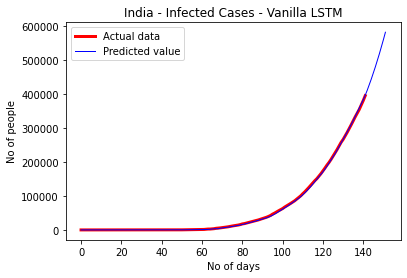

Percentage Error is :   0.39894227510997715


In [213]:
# Plotting the results
plt.plot(I_cases,label='Actual data',color='red',linewidth=3)
plt.plot(pred_out,label='Predicted value',color='blue',linewidth=1)
plt.legend(loc='best')
plt.xlabel('No of days')
plt.ylabel('No of people')
plt.title('India - Infected Cases - Vanilla LSTM')
plt.show()

# Finding Error between actual and predicted values
pred_out
pred = []
for i in range(len(I_act)):
  pred.append(pred_out[i])
pred=np.asarray(pred)

MSE = mean_squared_error(I_cases,pred)
RMS = np.sqrt(MSE)
#print(MSE, '\t',RMS)

total = I_cases[len(I_cases)-1]
#print(total)

percentage_error = (RMS*100)/total
print("Percentage Error is :  ",percentage_error)

### Bidirectional LSTM

A Bi-LSTM network consisting of 50 ReLU-activated units is compiled again with the $Adam$ optimizer and Mean-Squared Error loss function. This is trained for 50 epochs.

All hyperparameters are decided by trial and error.

In [151]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

x = x_raw.reshape(x_raw.shape[0], x_raw.shape[1], n_features)

model.fit(x, y, epochs = 50, verbose = False)

y_o = I_act[:n_steps]
for i in range(len(I_cases)):
    end = i + n_steps
    if end == len(I_cases):
        break
    x_in = I_cases[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(I_act))

pred_start = I_act[-n_steps:]

for i in range(n_days):
    end = i + n_steps
    x_in = np.array(pred_start)[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    pred_start.append(int(y_out))
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(I_act))
len(x_val)

142

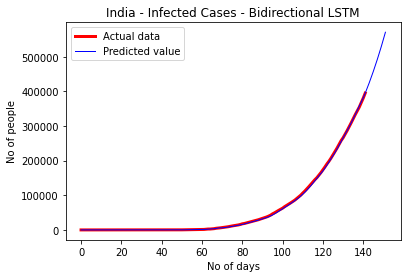

Percentage Error is :   0.40582002101510384


In [152]:
plt.plot(I_cases,label='Actual data',color='red',linewidth=3)
plt.plot(pred_out,label='Predicted value',color='blue',linewidth=1)
plt.legend(loc='best')
plt.xlabel('No of days')
plt.ylabel('No of people')
plt.title('India - Infected Cases - Bidirectional LSTM')
plt.show()

pred_out
pred = []
for i in range(len(I_act)):
  pred.append(pred_out[i])
pred=np.asarray(pred)

MSE = mean_squared_error(I_cases,pred)
RMS = np.sqrt(MSE)
#print(MSE, '\t',RMS)

total = I_cases[len(I_cases)-1]
#print(total)

percentage_error = (RMS*100)/total
print("Percentage Error is :  ",percentage_error)

## Recovered Cases

In [214]:
R_data = R_data.drop(columns=["Lat","Long"])
new_R = R_data.loc[R_data["Country/Region"]=="India"]
R_act=[]

new_R.iloc[0,2]

for i in range(10,len(new_R.columns)):
    R_act.append(new_R.iloc[0,i])

for i in range(len(R_act)):
    print('Day', i, ':', R_act[i])

R_cases = np.asarray(R_act)

x_raw, y = split_sequence(R_act, n_steps)

Day 0 : 0
Day 1 : 0
Day 2 : 0
Day 3 : 0
Day 4 : 0
Day 5 : 0
Day 6 : 0
Day 7 : 0
Day 8 : 0
Day 9 : 0
Day 10 : 0
Day 11 : 0
Day 12 : 0
Day 13 : 0
Day 14 : 0
Day 15 : 0
Day 16 : 0
Day 17 : 3
Day 18 : 3
Day 19 : 3
Day 20 : 3
Day 21 : 3
Day 22 : 3
Day 23 : 3
Day 24 : 3
Day 25 : 3
Day 26 : 3
Day 27 : 3
Day 28 : 3
Day 29 : 3
Day 30 : 3
Day 31 : 3
Day 32 : 3
Day 33 : 3
Day 34 : 3
Day 35 : 3
Day 36 : 3
Day 37 : 3
Day 38 : 3
Day 39 : 3
Day 40 : 4
Day 41 : 4
Day 42 : 4
Day 43 : 4
Day 44 : 4
Day 45 : 13
Day 46 : 13
Day 47 : 14
Day 48 : 14
Day 49 : 15
Day 50 : 20
Day 51 : 23
Day 52 : 27
Day 53 : 27
Day 54 : 40
Day 55 : 43
Day 56 : 45
Day 57 : 73
Day 58 : 84
Day 59 : 95
Day 60 : 102
Day 61 : 123
Day 62 : 148
Day 63 : 191
Day 64 : 192
Day 65 : 229
Day 66 : 229
Day 67 : 375
Day 68 : 421
Day 69 : 506
Day 70 : 620
Day 71 : 774
Day 72 : 969
Day 73 : 1080
Day 74 : 1181
Day 75 : 1359
Day 76 : 1432
Day 77 : 1768
Day 78 : 2041
Day 79 : 2463
Day 80 : 2854
Day 81 : 3273
Day 82 : 3975
Day 83 : 4370
Day 84 : 501

### Vanilla LSTM

In [215]:
#Single LSTM
model = Sequential()
model.add(LSTM(50, activation = 'relu', input_shape = (n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

x = x_raw.reshape(x_raw.shape[0], x_raw.shape[1], n_features)
model.fit(x, y, epochs = 200, verbose = False)

y_o = R_act[:n_steps]
for i in range(len(R_cases)):
    end = i + n_steps
    if end == len(R_cases):
        break
    x_in = R_cases[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    y_o.append(int(y_out))


In [216]:
pred_start = R_act[-n_steps:]
for i in range(pred_days):
    end = i + n_steps
    x_in = np.array(pred_start)[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    pred_start.append(int(y_out))
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(R_act))
len(x_val)

142

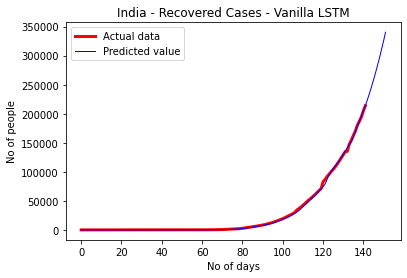

Percentage Error is :   0.725001807134736


In [217]:

plt.plot(R_cases,label='Actual data',color='red',linewidth=3)
plt.plot(pred_out,label='Predicted value',color='blue',linewidth=1)
plt.legend(loc='best')
plt.xlabel('No of days')
plt.ylabel('No of people')
plt.title('India - Recovered Cases - Vanilla LSTM')
plt.show()

pred_out

pred = []
for i in range(len(R_act)):
  pred.append(pred_out[i])
pred=np.asarray(pred)

MSE = mean_squared_error(R_cases,pred)
RMS = np.sqrt(MSE)
#print(MSE, '\t',RMS)

total = R_cases[len(R_cases)-1]
#print(total)

percentage_error = (RMS*100)/total
print("Percentage Error is :  ",percentage_error)

### Bidirectional LSTM

In [157]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

x = x_raw.reshape(x_raw.shape[0], x_raw.shape[1], n_features)

model.fit(x, y, epochs = 50, verbose = False)

y_o = R_act[:n_steps]
for i in range(len(R_cases)):
    end = i + n_steps
    if end == len(R_cases):
        break
    x_in = R_cases[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(R_act))

pred_start = R_act[-n_steps:]

for i in range(n_days):
    end = i + n_steps
    x_in = np.array(pred_start)[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    pred_start.append(int(y_out))
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(R_act))
len(x_val)

142

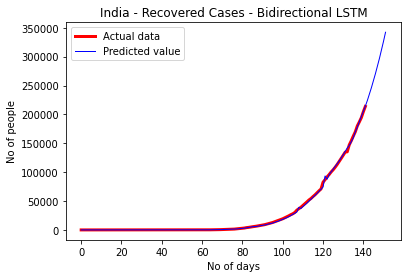

Percentage Error is :   0.6429919649309951


In [158]:
plt.plot(R_cases,label='Actual data',color='red',linewidth=3)
plt.plot(pred_out,label='Predicted value',color='blue',linewidth=1)
plt.legend(loc='best')
plt.xlabel('No of days')
plt.ylabel('No of people')
plt.title('India - Recovered Cases - Bidirectional LSTM')
plt.show()

pred_out
pred = []
for i in range(len(R_act)):
  pred.append(pred_out[i])
pred=np.asarray(pred)

MSE = mean_squared_error(R_cases,pred)
RMS = np.sqrt(MSE)
#print(MSE, '\t',RMS)

total = R_cases[len(R_cases)-1]
#print(total)

percentage_error = (RMS*100)/total
print("Percentage Error is :  ",percentage_error)

# Maharashtra


In [218]:
maha = covid_india_data.loc[covid_india_data['State/UnionTerritory'] == 'Maharashtra']
mahacases = maha.Confirmed.to_numpy()
mahalist = list(mahacases)
for i in range(len(mahalist)):
    print('Day', i, ':', mahalist[i])

x_raw, y = split_sequence(mahalist, n_steps)

Day 0 : 2
Day 1 : 5
Day 2 : 2
Day 3 : 11
Day 4 : 14
Day 5 : 14
Day 6 : 32
Day 7 : 32
Day 8 : 39
Day 9 : 42
Day 10 : 47
Day 11 : 52
Day 12 : 63
Day 13 : 67
Day 14 : 74
Day 15 : 89
Day 16 : 128
Day 17 : 124
Day 18 : 130
Day 19 : 180
Day 20 : 186
Day 21 : 198
Day 22 : 216
Day 23 : 302
Day 24 : 335
Day 25 : 335
Day 26 : 490
Day 27 : 490
Day 28 : 748
Day 29 : 868
Day 30 : 1018
Day 31 : 1135
Day 32 : 1364
Day 33 : 1574
Day 34 : 1761
Day 35 : 1985
Day 36 : 2337
Day 37 : 2687
Day 38 : 2919
Day 39 : 3205
Day 40 : 3323
Day 41 : 3651
Day 42 : 4203
Day 43 : 4669
Day 44 : 5221
Day 45 : 5652
Day 46 : 6430
Day 47 : 6817
Day 48 : 7628
Day 49 : 8068
Day 50 : 8590
Day 51 : 9318
Day 52 : 9915
Day 53 : 10498
Day 54 : 11506
Day 55 : 12296
Day 56 : 12974
Day 57 : 14541
Day 58 : 15525
Day 59 : 16758
Day 60 : 17974
Day 61 : 19063
Day 62 : 20228
Day 63 : 22171
Day 64 : 23401
Day 65 : 24427
Day 66 : 25922
Day 67 : 27524
Day 68 : 29100
Day 69 : 30706
Day 70 : 33053
Day 71 : 35058
Day 72 : 37136
Day 73 : 39297
Da

## Vanilla LSTM

In [219]:
#Single LSTM
model = Sequential()
model.add(LSTM(50, activation = 'relu', input_shape = (n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

x = x_raw.reshape(x_raw.shape[0], x_raw.shape[1], n_features)
model.fit(x, y, epochs = 200, verbose = False)

y_o = mahalist[:n_steps]
for i in range(len(mahacases)):
    end = i + n_steps
    if end == len(mahacases):
        break
    x_in = mahacases[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    y_o.append(int(y_out))

In [220]:
pred_start = mahalist[-n_steps:]
for i in range(pred_days):
    end = i + n_steps
    x_in = np.array(pred_start)[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    pred_start.append(int(y_out))
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(mahalist))
len(x_val)


103

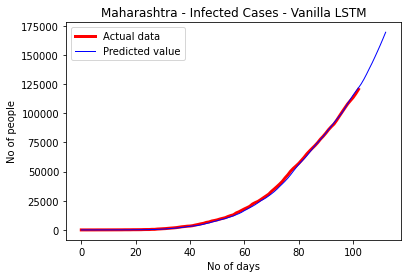

Percentage Error is :   0.8885341214001575


In [221]:
plt.plot(mahacases,label='Actual data',color='red',linewidth=3)
plt.plot(pred_out,label='Predicted value',color='blue',linewidth=1)
plt.legend(loc='best')
plt.xlabel('No of days')
plt.ylabel('No of people')
plt.title('Maharashtra - Infected Cases - Vanilla LSTM')
plt.show()

pred_out

pred = []
for i in range(len(mahalist)):
  pred.append(pred_out[i])
pred=np.asarray(pred)

MSE = mean_squared_error(mahacases,pred)
RMS = np.sqrt(MSE)
#print(MSE, '\t',RMS)

total = mahacases[len(mahacases)-1]
#print(total)

percentage_error = (RMS*100)/total
print("Percentage Error is :  ",percentage_error)

## Bidirectional LSTM

In [163]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

x = x_raw.reshape(x_raw.shape[0], x_raw.shape[1], n_features)

model.fit(x, y, epochs = 50, verbose = False)

y_o = mahalist[:n_steps]
for i in range(len(mahacases)):
    end = i + n_steps
    if end == len(mahacases):
        break
    x_in = mahacases[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(mahalist))

pred_start = mahalist[-n_steps:]

for i in range(n_days):
    end = i + n_steps
    x_in = np.array(pred_start)[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    pred_start.append(int(y_out))
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(mahalist))
len(x_val)

103

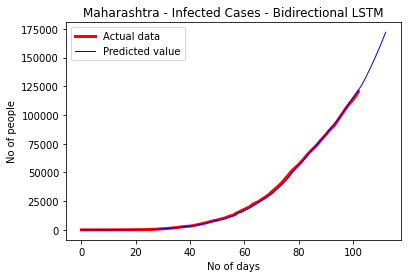

Percentage Error is :   0.7435839441853318


In [164]:
plt.plot(mahacases,label='Actual data',color='red',linewidth=3)
plt.plot(pred_out,label='Predicted value',color='blue',linewidth=1)
plt.legend(loc='best')
plt.xlabel('No of days')
plt.ylabel('No of people')
plt.title('Maharashtra - Infected Cases - Bidirectional LSTM')
plt.show()

pred_out
pred = []
for i in range(len(mahalist)):
  pred.append(pred_out[i])
pred=np.asarray(pred)

MSE = mean_squared_error(mahacases,pred)
RMS = np.sqrt(MSE)
#print(MSE, '\t',RMS)

total = mahacases[len(mahacases)-1]
#print(total)

percentage_error = (RMS*100)/total
print("Percentage Error is :  ",percentage_error)

# Tamil Nadu

In [222]:
tn = covid_india_data.loc[covid_india_data['State/UnionTerritory'] == 'Tamil Nadu']
tncases = tn.Confirmed.to_numpy()
tnlist = list(tncases)
for i in range(len(tnlist)):
    print('Day', i, ':', tnlist[i])

x_raw, y = split_sequence(tnlist, n_steps)

Day 0 : 1
Day 1 : 1
Day 2 : 1
Day 3 : 1
Day 4 : 1
Day 5 : 1
Day 6 : 1
Day 7 : 1
Day 8 : 1
Day 9 : 1
Day 10 : 1
Day 11 : 1
Day 12 : 2
Day 13 : 3
Day 14 : 3
Day 15 : 7
Day 16 : 9
Day 17 : 15
Day 18 : 18
Day 19 : 26
Day 20 : 29
Day 21 : 40
Day 22 : 49
Day 23 : 67
Day 24 : 74
Day 25 : 234
Day 26 : 234
Day 27 : 309
Day 28 : 411
Day 29 : 485
Day 30 : 571
Day 31 : 621
Day 32 : 690
Day 33 : 738
Day 34 : 834
Day 35 : 911
Day 36 : 969
Day 37 : 1075
Day 38 : 1173
Day 39 : 1204
Day 40 : 1242
Day 41 : 1267
Day 42 : 1323
Day 43 : 1372
Day 44 : 1477
Day 45 : 1520
Day 46 : 1596
Day 47 : 1629
Day 48 : 1683
Day 49 : 1755
Day 50 : 1821
Day 51 : 1885
Day 52 : 1937
Day 53 : 2058
Day 54 : 2162
Day 55 : 2323
Day 56 : 2526
Day 57 : 2757
Day 58 : 3023
Day 59 : 3550
Day 60 : 4058
Day 61 : 4829
Day 62 : 5409
Day 63 : 6009
Day 64 : 6535
Day 65 : 7204
Day 66 : 8002
Day 67 : 8718
Day 68 : 9227
Day 69 : 9674
Day 70 : 10108
Day 71 : 10585
Day 72 : 11224
Day 73 : 11760
Day 74 : 12448
Day 75 : 13191
Day 76 : 13967
Day 

## Vanilla LSTM

In [223]:
#Single LSTM
model = Sequential()
model.add(LSTM(50, activation = 'relu', input_shape = (n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

x = x_raw.reshape(x_raw.shape[0], x_raw.shape[1], n_features)
model.fit(x, y, epochs = 200, verbose = False)

y_o = tnlist[:n_steps]
for i in range(len(tncases)):
    end = i + n_steps
    if end == len(tncases):
        break
    x_in = tncases[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    y_o.append(int(y_out))



In [224]:
pred_start = tnlist[-n_steps:]
for i in range(pred_days):
    end = i + n_steps
    x_in = np.array(pred_start)[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    pred_start.append(int(y_out))
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(tnlist))
len(x_val)


105

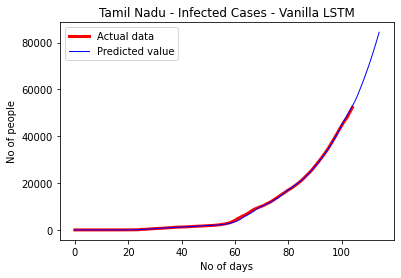

Percentage Error is :   0.5241873704148443


In [225]:
plt.plot(tncases,label='Actual data',color='red',linewidth=3)
plt.plot(pred_out,label='Predicted value',color='blue',linewidth=1)
plt.legend(loc='best')
plt.xlabel('No of days')
plt.ylabel('No of people')
plt.title('Tamil Nadu - Infected Cases - Vanilla LSTM')
plt.show()

pred_out
pred = []
for i in range(len(tnlist)):
  pred.append(pred_out[i])
pred=np.asarray(pred)

MSE = mean_squared_error(tncases,pred)
RMS = np.sqrt(MSE)
#print(MSE, '\t',RMS)

total = tncases[len(tncases)-1]
#print(total)

percentage_error = (RMS*100)/total
print("Percentage Error is :  ",percentage_error)

## Bidirectional LSTM

In [169]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

x = x_raw.reshape(x_raw.shape[0], x_raw.shape[1], n_features)

model.fit(x, y, epochs = 50, verbose = False)

y_o = tnlist[:n_steps]
for i in range(len(tncases)):
    end = i + n_steps
    if end == len(tncases):
        break
    x_in = tncases[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(tnlist))

pred_start = tnlist[-n_steps:]

for i in range(n_days):
    end = i + n_steps
    x_in = np.array(pred_start)[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    pred_start.append(int(y_out))
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(tnlist))
len(x_val)

105

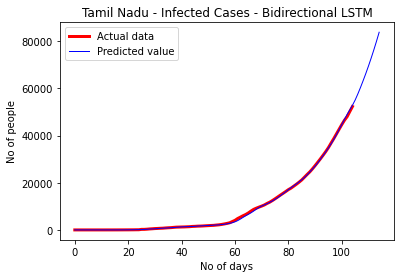

Percentage Error is :   0.5066758874263828


In [170]:
plt.plot(tncases,label='Actual data',color='red',linewidth=3)
plt.plot(pred_out,label='Predicted value',color='blue',linewidth=1)
plt.legend(loc='best')
plt.xlabel('No of days')
plt.ylabel('No of people')
plt.title('Tamil Nadu - Infected Cases - Bidirectional LSTM')
plt.show()

pred_out
pred = []
for i in range(len(tnlist)):
  pred.append(pred_out[i])
pred=np.asarray(pred)

MSE = mean_squared_error(tncases,pred)
RMS = np.sqrt(MSE)
#print(MSE, '\t',RMS)

total = tncases[len(tncases)-1]
#print(total)

percentage_error = (RMS*100)/total
print("Percentage Error is :  ",percentage_error)

# Delhi

In [226]:
delhi = covid_india_data.loc[covid_india_data['State/UnionTerritory'] == 'Delhi']
delhicases = delhi.Confirmed.to_numpy()
delhilist = list(delhicases)
for i in range(len(delhilist)):
    print('Day', i, ':', delhilist[i])

x_raw, y = split_sequence(delhilist, n_steps)

Day 0 : 1
Day 1 : 1
Day 2 : 1
Day 3 : 2
Day 4 : 3
Day 5 : 3
Day 6 : 3
Day 7 : 4
Day 8 : 4
Day 9 : 5
Day 10 : 6
Day 11 : 6
Day 12 : 7
Day 13 : 7
Day 14 : 7
Day 15 : 8
Day 16 : 10
Day 17 : 12
Day 18 : 17
Day 19 : 26
Day 20 : 29
Day 21 : 29
Day 22 : 30
Day 23 : 31
Day 24 : 36
Day 25 : 36
Day 26 : 39
Day 27 : 49
Day 28 : 87
Day 29 : 97
Day 30 : 152
Day 31 : 219
Day 32 : 219
Day 33 : 445
Day 34 : 503
Day 35 : 523
Day 36 : 576
Day 37 : 576
Day 38 : 669
Day 39 : 898
Day 40 : 903
Day 41 : 1069
Day 42 : 1154
Day 43 : 1510
Day 44 : 1561
Day 45 : 1578
Day 46 : 1640
Day 47 : 1707
Day 48 : 1893
Day 49 : 2003
Day 50 : 2081
Day 51 : 2156
Day 52 : 2248
Day 53 : 2376
Day 54 : 2514
Day 55 : 2625
Day 56 : 2918
Day 57 : 3108
Day 58 : 3314
Day 59 : 3439
Day 60 : 3515
Day 61 : 3738
Day 62 : 4122
Day 63 : 4549
Day 64 : 4898
Day 65 : 5104
Day 66 : 5532
Day 67 : 5980
Day 68 : 6318
Day 69 : 6542
Day 70 : 6923
Day 71 : 7233
Day 72 : 7639
Day 73 : 7998
Day 74 : 8470
Day 75 : 8895
Day 76 : 9333
Day 77 : 10054
Day 

## Vanilla LSTM

In [227]:
#Single LSTM
model = Sequential()
model.add(LSTM(50, activation = 'relu', input_shape = (n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

x = x_raw.reshape(x_raw.shape[0], x_raw.shape[1], n_features)
model.fit(x, y, epochs = 200, verbose = False)

y_o = delhilist[:n_steps]
for i in range(len(delhicases)):
    end = i + n_steps
    if end == len(delhicases):
        break
    x_in = delhicases[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    y_o.append(int(y_out))



In [228]:
pred_start = delhilist[-n_steps:]
for i in range(pred_days):
    end = i + n_steps
    x_in = np.array(pred_start)[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    pred_start.append(int(y_out))
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(delhilist))
len(x_val)


110

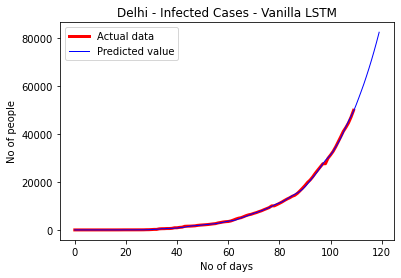

Percentage Error is :   0.4859847973882214


In [229]:
plt.plot(delhicases,label='Actual data',color='red',linewidth=3)
plt.plot(pred_out,label='Predicted value',color='blue',linewidth=1)
plt.legend(loc='best')
plt.xlabel('No of days')
plt.ylabel('No of people')
plt.title('Delhi - Infected Cases - Vanilla LSTM')
plt.show()

pred_out
pred = []
for i in range(len(delhilist)):
  pred.append(pred_out[i])
pred=np.asarray(pred)

MSE = mean_squared_error(delhicases,pred)
RMS = np.sqrt(MSE)
#print(MSE, '\t',RMS)

total = delhicases[len(delhicases)-1]
#print(total)

percentage_error = (RMS*100)/total
print("Percentage Error is :  ",percentage_error)

## Bidirectional LSTM

In [175]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

x = x_raw.reshape(x_raw.shape[0], x_raw.shape[1], n_features)

model.fit(x, y, epochs = 50, verbose = False)

y_o = delhilist[:n_steps]
for i in range(len(delhicases)):
    end = i + n_steps
    if end == len(delhicases):
        break
    x_in = delhicases[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(delhilist))

pred_start = delhilist[-n_steps:]

for i in range(n_days):
    end = i + n_steps
    x_in = np.array(pred_start)[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    pred_start.append(int(y_out))
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(delhilist))
len(x_val)

110

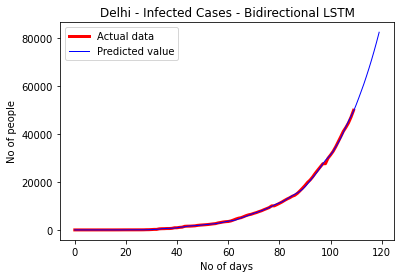

Percentage Error is :   0.48311053922821756


In [176]:
plt.plot(delhicases,label='Actual data',color='red',linewidth=3)
plt.plot(pred_out,label='Predicted value',color='blue',linewidth=1)
plt.legend(loc='best')
plt.xlabel('No of days')
plt.ylabel('No of people')
plt.title('Delhi - Infected Cases - Bidirectional LSTM')
plt.show()

pred_out
pred = []
for i in range(len(delhilist)):
  pred.append(pred_out[i])
pred=np.asarray(pred)

MSE = mean_squared_error(delhicases,pred)
RMS = np.sqrt(MSE)
#print(MSE, '\t',RMS)

total = delhicases[len(delhicases)-1]
#print(total)

percentage_error = (RMS*100)/total
print("Percentage Error is :  ",percentage_error)

# Gujarat

In [230]:
guj = covid_india_data.loc[covid_india_data['State/UnionTerritory'] == 'Gujarat']
gujcases = guj.Confirmed.to_numpy()
gujlist = list(gujcases)
for i in range(len(gujlist)):
    print('Day', i, ':', gujlist[i])

x_raw, y = split_sequence(gujlist, n_steps)

Day 0 : 5
Day 1 : 7
Day 2 : 18
Day 3 : 29
Day 4 : 33
Day 5 : 38
Day 6 : 43
Day 7 : 43
Day 8 : 45
Day 9 : 58
Day 10 : 69
Day 11 : 73
Day 12 : 82
Day 13 : 87
Day 14 : 95
Day 15 : 105
Day 16 : 122
Day 17 : 144
Day 18 : 165
Day 19 : 165
Day 20 : 179
Day 21 : 241
Day 22 : 308
Day 23 : 432
Day 24 : 539
Day 25 : 617
Day 26 : 695
Day 27 : 871
Day 28 : 1021
Day 29 : 1272
Day 30 : 1604
Day 31 : 1851
Day 32 : 2066
Day 33 : 2272
Day 34 : 2407
Day 35 : 2624
Day 36 : 2815
Day 37 : 3071
Day 38 : 3301
Day 39 : 3548
Day 40 : 3774
Day 41 : 4082
Day 42 : 4395
Day 43 : 4721
Day 44 : 5055
Day 45 : 5428
Day 46 : 5804
Day 47 : 6245
Day 48 : 6625
Day 49 : 7012
Day 50 : 7402
Day 51 : 7796
Day 52 : 8194
Day 53 : 8541
Day 54 : 8903
Day 55 : 9267
Day 56 : 9591
Day 57 : 9931
Day 58 : 10988
Day 59 : 11379
Day 60 : 11745
Day 61 : 12140
Day 62 : 12537
Day 63 : 12905
Day 64 : 13268
Day 65 : 13664
Day 66 : 14056
Day 67 : 14460
Day 68 : 14821
Day 69 : 15195
Day 70 : 15562
Day 71 : 15934
Day 72 : 16343
Day 73 : 16779
Day

## Vanilla LSTM

In [231]:
#Single LSTM
model = Sequential()
model.add(LSTM(50, activation = 'relu', input_shape = (n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

x = x_raw.reshape(x_raw.shape[0], x_raw.shape[1], n_features)
model.fit(x, y, epochs = 200, verbose = False)

y_o = gujlist[:n_steps]
for i in range(len(gujcases)):
    end = i + n_steps
    if end == len(gujcases):
        break
    x_in = gujcases[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    y_o.append(int(y_out))



In [232]:
pred_start = gujlist[-n_steps:]
for i in range(pred_days):
    end = i + n_steps
    x_in = np.array(pred_start)[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    pred_start.append(int(y_out))
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(gujlist))
len(x_val)


92

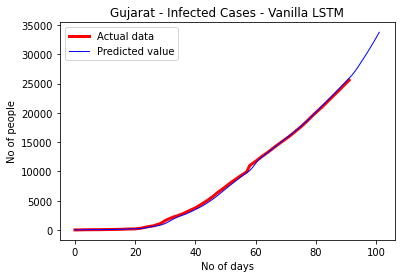

Percentage Error is :   0.9955898641947513


In [233]:
plt.plot(gujcases,label='Actual data',color='red',linewidth=3)
plt.plot(pred_out,label='Predicted value',color='blue',linewidth=1)
plt.legend(loc='best')
plt.xlabel('No of days')
plt.ylabel('No of people')
plt.title('Gujarat - Infected Cases - Vanilla LSTM')
plt.show()

pred_out
pred = []
for i in range(len(gujlist)):
  pred.append(pred_out[i])
pred=np.asarray(pred)

MSE = mean_squared_error(gujcases,pred)
RMS = np.sqrt(MSE)
#print(MSE, '\t',RMS)

total = gujcases[len(gujcases)-1]
#print(total)

percentage_error = (RMS*100)/total
print("Percentage Error is :  ",percentage_error)

## Bidirectional LSTM

In [181]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

x = x_raw.reshape(x_raw.shape[0], x_raw.shape[1], n_features)

model.fit(x, y, epochs = 50, verbose = False)

y_o = gujlist[:n_steps]
for i in range(len(gujcases)):
    end = i + n_steps
    if end == len(gujcases):
        break
    x_in = gujcases[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(gujlist))

pred_start = gujlist[-n_steps:]

for i in range(n_days):
    end = i + n_steps
    x_in = np.array(pred_start)[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    pred_start.append(int(y_out))
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(gujlist))
len(x_val)

92

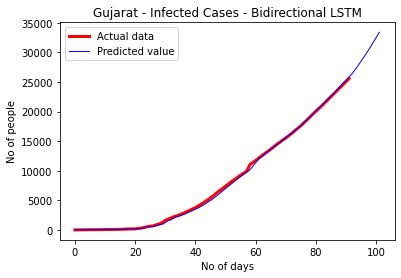

Percentage Error is :   0.9208053066370598


In [182]:
plt.plot(gujcases,label='Actual data',color='red',linewidth=3)
plt.plot(pred_out,label='Predicted value',color='blue',linewidth=1)
plt.legend(loc='best')
plt.xlabel('No of days')
plt.ylabel('No of people')
plt.title('Gujarat - Infected Cases - Bidirectional LSTM')
plt.show()

pred_out
pred = []
for i in range(len(gujlist)):
  pred.append(pred_out[i])
pred=np.asarray(pred)

MSE = mean_squared_error(gujcases,pred)
RMS = np.sqrt(MSE)
#print(MSE, '\t',RMS)

total = gujcases[len(gujcases)-1]
#print(total)

percentage_error = (RMS*100)/total
print("Percentage Error is :  ",percentage_error)

# Uttar Pradesh

In [234]:
UP = covid_india_data.loc[covid_india_data['State/UnionTerritory'] == 'Uttar Pradesh']
UPcases = UP.Confirmed.to_numpy()
UPlist = list(UPcases)
for i in range(len(UPlist)):
    print('Day', i, ':', UPlist[i])

x_raw, y = split_sequence(UPlist, n_steps)

Day 0 : 6
Day 1 : 7
Day 2 : 7
Day 3 : 7
Day 4 : 7
Day 5 : 7
Day 6 : 7
Day 7 : 9
Day 8 : 11
Day 9 : 11
Day 10 : 12
Day 11 : 13
Day 12 : 13
Day 13 : 15
Day 14 : 16
Day 15 : 19
Day 16 : 23
Day 17 : 24
Day 18 : 27
Day 19 : 31
Day 20 : 33
Day 21 : 37
Day 22 : 41
Day 23 : 41
Day 24 : 55
Day 25 : 65
Day 26 : 82
Day 27 : 101
Day 28 : 103
Day 29 : 113
Day 30 : 172
Day 31 : 174
Day 32 : 227
Day 33 : 305
Day 34 : 305
Day 35 : 343
Day 36 : 410
Day 37 : 431
Day 38 : 433
Day 39 : 452
Day 40 : 483
Day 41 : 657
Day 42 : 735
Day 43 : 773
Day 44 : 846
Day 45 : 969
Day 46 : 1084
Day 47 : 1176
Day 48 : 1294
Day 49 : 1412
Day 50 : 1509
Day 51 : 1604
Day 52 : 1778
Day 53 : 1843
Day 54 : 1955
Day 55 : 2043
Day 56 : 2115
Day 57 : 2203
Day 58 : 2281
Day 59 : 2328
Day 60 : 2626
Day 61 : 2742
Day 62 : 2859
Day 63 : 2880
Day 64 : 2998
Day 65 : 3071
Day 66 : 3214
Day 67 : 3373
Day 68 : 3467
Day 69 : 3573
Day 70 : 3664
Day 71 : 3729
Day 72 : 3902
Day 73 : 4057
Day 74 : 4258
Day 75 : 4259
Day 76 : 4605
Day 77 : 4926

## Vanilla LSTM

In [235]:
#Single LSTM
model = Sequential()
model.add(LSTM(50, activation = 'relu', input_shape = (n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

x = x_raw.reshape(x_raw.shape[0], x_raw.shape[1], n_features)
model.fit(x, y, epochs = 200, verbose = False)

y_o = UPlist[:n_steps]
for i in range(len(UPcases)):
    end = i + n_steps
    if end == len(UPcases):
        break
    x_in = UPcases[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    y_o.append(int(y_out))



In [236]:
pred_start = UPlist[-n_steps:]
for i in range(pred_days):
    end = i + n_steps
    x_in = np.array(pred_start)[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    pred_start.append(int(y_out))
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(UPlist))
len(x_val)


108

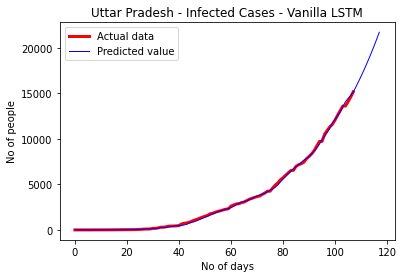

Percentage Error is :   0.7680513572561123


In [237]:
plt.plot(UPcases,label='Actual data',color='red',linewidth=3)
plt.plot(pred_out,label='Predicted value',color='blue',linewidth=1)
plt.legend(loc='best')
plt.xlabel('No of days')
plt.ylabel('No of people')
plt.title('Uttar Pradesh - Infected Cases - Vanilla LSTM')
plt.show()

pred_out
pred = []
for i in range(len(UPlist)):
  pred.append(pred_out[i])
pred=np.asarray(pred)

MSE = mean_squared_error(UPcases,pred)
RMS = np.sqrt(MSE)
#print(MSE, '\t',RMS)

total = UPcases[len(UPcases)-1]
#print(total)

percentage_error = (RMS*100)/total
print("Percentage Error is :  ",percentage_error)

## Bidirectional LSTM

In [187]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

x = x_raw.reshape(x_raw.shape[0], x_raw.shape[1], n_features)

model.fit(x, y, epochs = 50, verbose = False)

y_o = UPlist[:n_steps]
for i in range(len(UPcases)):
    end = i + n_steps
    if end == len(UPcases):
        break
    x_in = UPcases[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(UPlist))

pred_start = UPlist[-n_steps:]

for i in range(n_days):
    end = i + n_steps
    x_in = np.array(pred_start)[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    pred_start.append(int(y_out))
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(UPlist))
len(x_val)

108

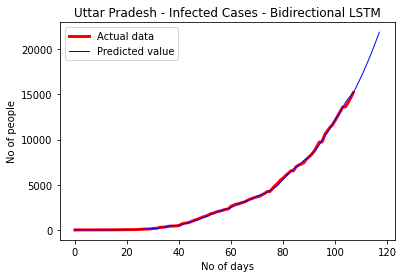

Percentage Error is :   0.7368524005110528


In [188]:
plt.plot(UPcases,label='Actual data',color='red',linewidth=3)
plt.plot(pred_out,label='Predicted value',color='blue',linewidth=1)
plt.legend(loc='best')
plt.xlabel('No of days')
plt.ylabel('No of people')
plt.title('Uttar Pradesh - Infected Cases - Bidirectional LSTM')
plt.show()

pred_out
pred = []
for i in range(len(UPlist)):
  pred.append(pred_out[i])
pred=np.asarray(pred)

MSE = mean_squared_error(UPcases,pred)
RMS = np.sqrt(MSE)
#print(MSE, '\t',RMS)

total = UPcases[len(UPcases)-1]
#print(total)

percentage_error = (RMS*100)/total
print("Percentage Error is :  ",percentage_error)

# Kerala

In [238]:
kerala = covid_india_data.loc[covid_india_data['State/UnionTerritory'] == 'Kerala']
keralacases = kerala.Confirmed.to_numpy()
keralalist = list(keralacases)
for i in range(len(keralalist)):
    print('Day', i, ':', keralalist[i])

x_raw, y = split_sequence(keralalist, n_steps)

Day 0 : 1
Day 1 : 1
Day 2 : 2
Day 3 : 3
Day 4 : 3
Day 5 : 3
Day 6 : 3
Day 7 : 3
Day 8 : 3
Day 9 : 3
Day 10 : 3
Day 11 : 3
Day 12 : 3
Day 13 : 3
Day 14 : 3
Day 15 : 3
Day 16 : 3
Day 17 : 3
Day 18 : 3
Day 19 : 3
Day 20 : 3
Day 21 : 3
Day 22 : 3
Day 23 : 3
Day 24 : 3
Day 25 : 3
Day 26 : 3
Day 27 : 3
Day 28 : 3
Day 29 : 3
Day 30 : 3
Day 31 : 3
Day 32 : 3
Day 33 : 3
Day 34 : 3
Day 35 : 3
Day 36 : 3
Day 37 : 3
Day 38 : 8
Day 39 : 9
Day 40 : 15
Day 41 : 17
Day 42 : 17
Day 43 : 19
Day 44 : 19
Day 45 : 22
Day 46 : 23
Day 47 : 26
Day 48 : 27
Day 49 : 27
Day 50 : 28
Day 51 : 40
Day 52 : 52
Day 53 : 67
Day 54 : 95
Day 55 : 109
Day 56 : 118
Day 57 : 137
Day 58 : 176
Day 59 : 182
Day 60 : 202
Day 61 : 234
Day 62 : 241
Day 63 : 265
Day 64 : 286
Day 65 : 295
Day 66 : 306
Day 67 : 314
Day 68 : 327
Day 69 : 336
Day 70 : 345
Day 71 : 357
Day 72 : 364
Day 73 : 374
Day 74 : 376
Day 75 : 379
Day 76 : 387
Day 77 : 388
Day 78 : 395
Day 79 : 396
Day 80 : 400
Day 81 : 402
Day 82 : 408
Day 83 : 427
Day 84 : 438


## Vanilla LSTM

In [239]:
#Single LSTM
model = Sequential()
model.add(LSTM(50, activation = 'relu', input_shape = (n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

x = x_raw.reshape(x_raw.shape[0], x_raw.shape[1], n_features)
model.fit(x, y, epochs = 200, verbose = False)

y_o = keralalist[:n_steps]
for i in range(len(keralacases)):
    end = i + n_steps
    if end == len(keralacases):
        break
    x_in = keralacases[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    y_o.append(int(y_out))


In [240]:
pred_start = keralalist[-n_steps:]
for i in range(pred_days):
    end = i + n_steps
    x_in = np.array(pred_start)[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    pred_start.append(int(y_out))
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(keralalist))
len(x_val)

142

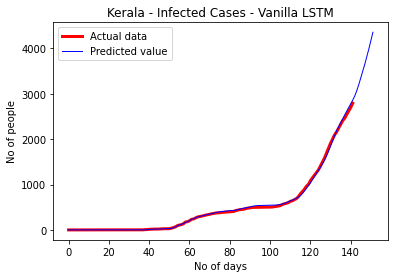

Percentage Error is :   0.929750828221328


In [241]:
plt.plot(keralacases,label='Actual data',color='red',linewidth=3)
plt.plot(pred_out,label='Predicted value',color='blue',linewidth=1)
plt.legend(loc='best')
plt.xlabel('No of days')
plt.ylabel('No of people')
plt.title('Kerala - Infected Cases - Vanilla LSTM')
plt.show()

pred_out
pred = []
for i in range(len(keralalist)):
  pred.append(pred_out[i])
pred=np.asarray(pred)

MSE = mean_squared_error(keralacases,pred)
RMS = np.sqrt(MSE)
#print(MSE, '\t',RMS)

total = keralacases[len(keralacases)-1]
#print(total)

percentage_error = (RMS*100)/total
print("Percentage Error is :  ",percentage_error)

## Bidirectional LSTM

In [193]:
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

x = x_raw.reshape(x_raw.shape[0], x_raw.shape[1], n_features)

model.fit(x, y, epochs = 50, verbose = False)

y_o = keralalist[:n_steps]
for i in range(len(keralacases)):
    end = i + n_steps
    if end == len(keralacases):
        break
    x_in = keralacases[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(keralalist))

pred_start = keralalist[-n_steps:]

for i in range(n_days):
    end = i + n_steps
    x_in = np.array(pred_start)[i:end]
    x_in = x_in.reshape(1, n_steps, n_features)
    y_out = model.predict(x_in, verbose = 0)
    pred_start.append(int(y_out))
    y_o.append(int(y_out))

pred_out = np.array(y_o)
x_val = np.arange(len(keralalist))
len(x_val)

142

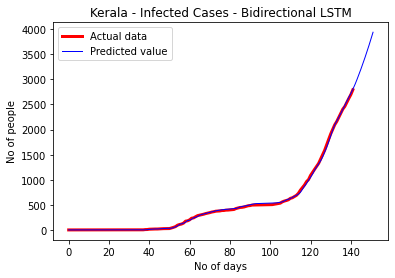

Percentage Error is :   0.5894235211013865


In [194]:
plt.plot(keralacases,label='Actual data',color='red',linewidth=3)
plt.plot(pred_out,label='Predicted value',color='blue',linewidth=1)
plt.legend(loc='best')
plt.xlabel('No of days')
plt.ylabel('No of people')
plt.title('Kerala - Infected Cases - Bidirectional LSTM')
plt.show()

pred_out
pred = []
for i in range(len(keralalist)):
  pred.append(pred_out[i])
pred=np.asarray(pred)

MSE = mean_squared_error(keralacases,pred)
RMS = np.sqrt(MSE)
#print(MSE, '\t',RMS)

total = keralacases[len(keralacases)-1]
#print(total)

percentage_error = (RMS*100)/total
print("Percentage Error is :  ",percentage_error)